GA-DSI Weekly Project 2: Billboard

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import csv

# Below code drawn from http://stackoverflow.com/questions/1366775/ \
#      how-to-convert-tab-separated-pipe-separated-to-csv-file-format-in-python

# Conversion originally done by passing txt file through Excel

BB = []

# parsing | delimiter
f = open("/Users/EKandTower/Dropbox/GA-DSI/all_billboard_data.txt", "rb")
readerpipe = csv.reader(f, delimiter = "|")
for row in readerpipe:
    BB.append(row)
# f.close()


### end quoted code ###



In [4]:
# truncate year-month-day code in data to reflect year only
for sublist in BB:
     sublist[-1] = sublist[-1][:4]

# create a dataframe from the information from BB (the txt file)        
df = pd.DataFrame.from_records(BB)

# reset the headers to be the first list from BB
df.columns = (df.iloc[0])
df.reindex(df.index.drop(0))
df.drop(df.index[[0]], inplace=True)

# change column name "char" to "year"
df.columns = ['year' if x=='char' else x for x in df.columns]

# change data type for entry postion and overall weeks on chart to numeric.
# I didn't change other columns in order to keep the code clean. 
# I didn't get rid of any columns in case I decided later I wanted something else.
df[['entry position', 'overall weeks on chart']] = df[['entry position', 'overall weeks on chart']].apply(pd.to_numeric)



In [5]:
# create a pivot table with stats I am most interested in 
BB_pivot = pd.pivot_table(df, index=['year'][:30], values=['overall weeks on chart','entry position'],\
               aggfunc=[np.mean, np.max, np.min])


BB_pivot


mean                                  amax  \
     entry position overall weeks on chart entry position   
year                                                        
1940       6.787500               8.654167           10.0   
1941       7.380769               8.973077           10.0   
1942       7.644231              10.492308           10.0   
1943       8.109615              12.740385           10.0   
1944       6.896679              10.636531           17.0   
1945       7.058491               9.356604           10.0   
1946       7.430769              10.230769           10.0   
1947       7.650995               9.589512           15.0   
1948      13.536559              13.783871           20.0   
1949      15.371154              13.091346           20.0   
1950      14.589423              12.078846           20.0   
1951      15.875000              15.957692           20.0   
1952      16.006731              14.952885           20.0   
1953      16.074038              14.841346           20.0   
1954      16.287736              14.550000           30.0   
1955      35.525933              13.774600          100.0   
1956      69.657809              14.013865          100.0   
1957      72.423665              15.696358          100.0   
1958      72.866471              13.184118          100.0   
1959      91.161165              12.261959          115.0   
1960      97.351092              11.822857          115.0   
1961      96.224205               9.875243          124.0   
1962      97.717682               9.902692          133.0   
1963     104.458333               9.662986          136.0   
1964     103.635816               8.753767          135.0   
1965     106.072997               8.876248          135.0   
1966     105.848561               8.798877          135.0   
1967     104.840498               8.851498          135.0   
1968     103.468199               9.521798          136.0   
1969     104.605115               9.690863          135.0   
...             ...                    ...            ...   
1986      79.571923              15.763462           99.0   
1987      81.021731              16.101923           99.0   
1988      80.214340              16.768113          100.0   
1989      81.026346              16.298846          100.0   
1990      79.583269              16.785577          100.0   
1991      80.663269              16.567500          100.0   
1992      81.331154              18.219423          100.0   
1993      81.332115              18.986731          100.0   
1994      79.856038              20.265283          100.0   
1995      73.447308              20.858462          100.0   
1996      64.400577              21.843846          100.0   
1997      59.536346              21.382115          100.0   
1998      55.747885              20.605769           99.0   
1999      72.995577              18.689423          100.0   
2000      74.019811              20.789057          100.0   
2001      75.843269              21.395769          100.0   
2002      75.488846              20.965385           99.0   
2003      74.421346              20.650385           99.0   
2004      74.603846              21.125577          100.0   
2005      81.960377              21.184528          100.0   
2006      83.597692              21.149423          100.0   
2007      80.569198              20.810910          100.0   
2008      79.220385              20.689423          100.0   
2009      75.113676              20.748606          100.0   
2010      71.719038              20.683462          100.0   
2011      71.886604              20.898302          100.0   
2012      73.876154              23.749423          100.0   
2013      74.934423              23.042308          100.0   
2014      76.327308              22.853077          100.0   
2015      76.359000              15.277000          100.0   

                                      amin                         
     overall weeks on chart entry position

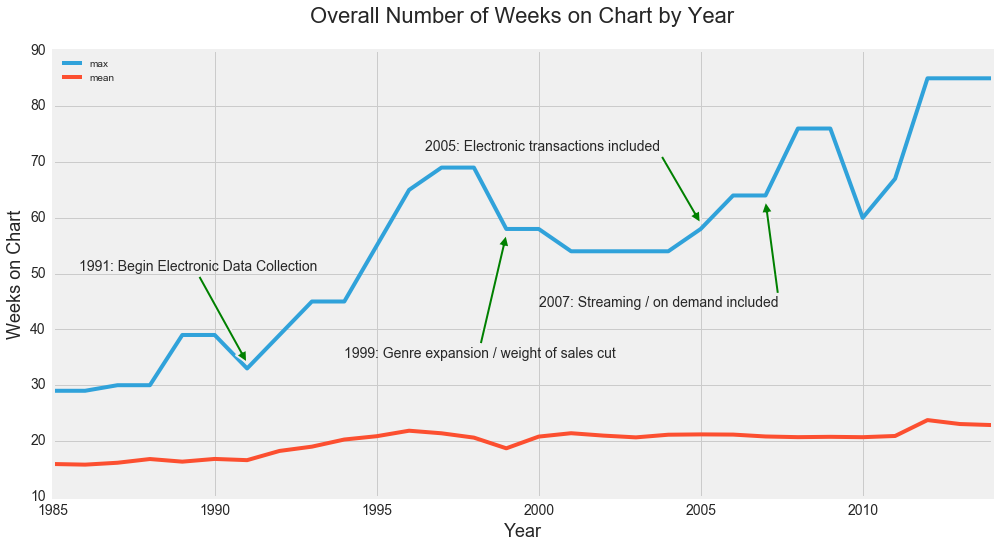

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


# create line graph for max and mean overall number of weeks on the chart
# min excluded--no value. Years prior to 1985 excluded.
WoCstats= df.groupby('year')['overall weeks on chart'].agg([max, np.mean]);

WoCstats.iloc[45:75].plot(figsize=(15,8), fontsize=14).set_title('Overall Number of Weeks on Chart by Year',\
    fontsize=22, y=1.05)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Weeks on Chart', fontsize=18)

# added annotation to make it easier to see when the methodology changes were made and how they impacted the data
plt.annotate('1991: Begin Electronic Data Collection', fontsize=14, xy=(6, 34), xytext=(.8, 50.5),
             arrowprops=dict(facecolor='g', linewidth=2.0))

plt.annotate('1999: Genre expansion / weight of sales cut', fontsize=14, xy=(14, 57), xytext=(9, 35),
             arrowprops=dict(facecolor='g', linewidth=2.0))

plt.annotate('2005: Electronic transactions included', fontsize=14, xy=(20, 59), xytext=(11.5, 72),
             arrowprops=dict(facecolor='g', linewidth=2.0))

plt.annotate('2007: Streaming / on demand included', fontsize=14, xy=(22, 63), xytext=(15, 44),
             arrowprops=dict(facecolor='g', linewidth=2.0));

# .savefig('/Users/EKandTower/Dropbox/GA-DSI/WeeksOnChart.jpg')

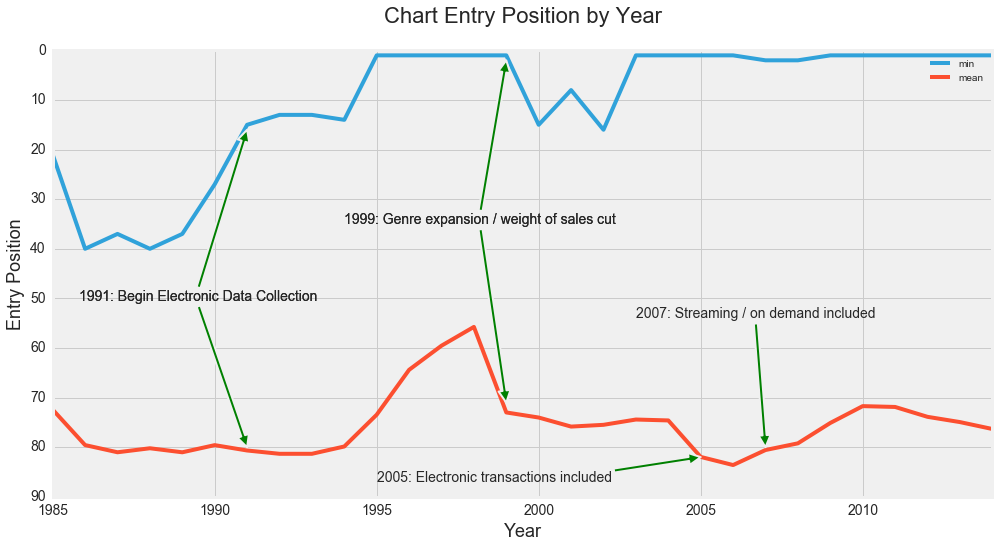

In [12]:
# create line graph for max, min, and mean entry position on the chart
# Min excluded--no value. Years prior to 1985 excluded.
WoCstats= df.groupby('year')['entry position'].agg([min, np.mean]);

WoCstats.iloc[45:75].plot(figsize=(15,8), fontsize=14).set_title('Chart Entry Position by Year',\
    fontsize=22, y=1.05)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Entry Position', fontsize=18)

#because there were interesting changes in both the mean and min I annotated both
plt.annotate('1991: Begin Electronic Data Collection', fontsize=14, xy=(6, 16), xytext=(.8, 50.5),
             arrowprops=dict(facecolor='g', linewidth=2.0))
plt.annotate('1991: Begin Electronic Data Collection', fontsize=14, xy=(6, 80), xytext=(.8, 50.5),
             arrowprops=dict(facecolor='g', linewidth=2.0))

plt.annotate('1999: Genre expansion / weight of sales cut', fontsize=14, xy=(14, 2), xytext=(9, 35),
             arrowprops=dict(facecolor='g', linewidth=2.0))
plt.annotate('1999: Genre expansion / weight of sales cut', fontsize=14, xy=(14, 71), xytext=(9, 35),
             arrowprops=dict(facecolor='g', linewidth=2.0))

plt.annotate('2005: Electronic transactions included', fontsize=14, xy=(20, 82), xytext=(10, 87),
             arrowprops=dict(facecolor='g', linewidth=2.0))


plt.annotate('2007: Streaming / on demand included', fontsize=14, xy=(22, 80), xytext=(18, 54),
             arrowprops=dict(facecolor='g', linewidth=2.0));


#inverted Y axis since a 1 on this chart is the best achievable while 100 is the worst.
plt.gca().invert_yaxis()

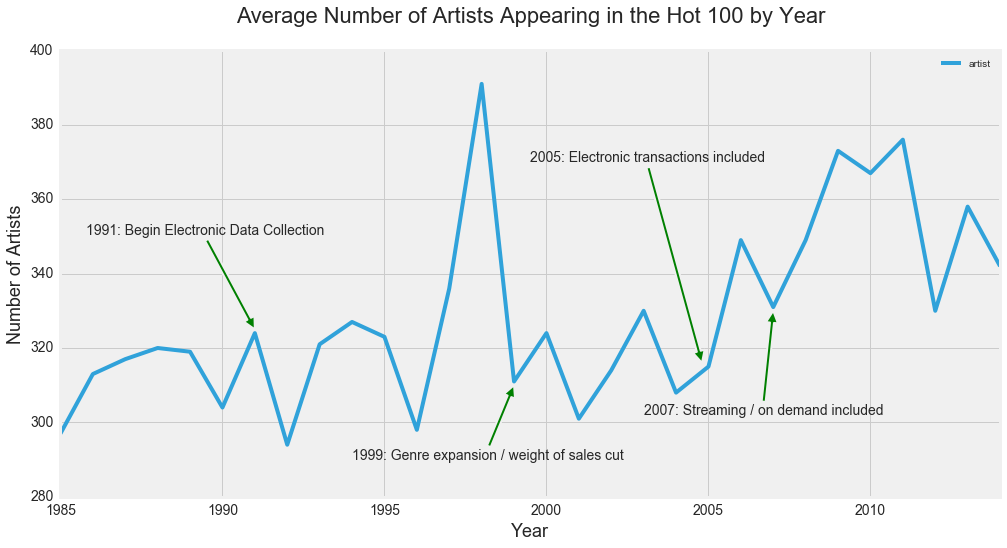

In [6]:
UnArt = df.groupby('year')['artist'].nunique().to_frame()
UnArt.iloc[45:75].plot(figsize=(15,8), fontsize=14).set_title('Average Number of Artists Appearing in the Hot 100 by Year',\
    fontsize=22, y=1.05)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Artists', fontsize=18)
plt.annotate('1991: Begin Electronic Data Collection', fontsize=14, xy=(6, 325), xytext=(.8, 350.5),
             arrowprops=dict(facecolor='g', linewidth=2.0))

plt.annotate('1999: Genre expansion / weight of sales cut', fontsize=14, xy=(14, 310), xytext=(9, 290),
             arrowprops=dict(facecolor='g', linewidth=2.0))

plt.annotate('2005: Electronic transactions included', fontsize=14, xy=(19.8, 316), xytext=(14.5, 370),
             arrowprops=dict(facecolor='g', linewidth=2.0))


plt.annotate('2007: Streaming / on demand included', fontsize=14, xy=(22, 330), xytext=(18, 302),
             arrowprops=dict(facecolor='g', linewidth=2.0));

